<a href="https://colab.research.google.com/github/erickx22x/AI-2022-googlecolab/blob/main/Avalia%C3%A7%C3%A3o_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports necessários

In [ ]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Obtenção da base de dados

Base de dados sobre benchmarks de placas de vídeo feitas utilizando as ferramentas mais conhecidas.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
boards = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GPU_benchmarks.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
boards.head()

,gpuName,G3Dmark,G2Dmark,TDP,price,gpuValue,powerPerformance,category
0,GeForce RTX 3090 Ti,29130,"1,124",NaN,2099.99,13.87,NaN,Unknown
1,GeForce RTX 3080 Ti,26878,"1,030",350.0,1199.99,22.40,77.0,Desktop
2,GeForce RTX 3090,26395,999,350.0,1749.99,15.08,75.0,Desktop
3,Radeon RX 6900 XT,25445,"1,103",300.0,1120.31,22.71,85.0,Desktop
4,GeForce RTX 3080,24850,"1,003",320.0,999.00,24.87,78.0,Desktop


In [ ]:
boards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gpuName           2317 non-null   object 
 1   G3Dmark           2317 non-null   int64  
 2   G2Dmark           2317 non-null   object 
 3   TDP               685 non-null    float64
 4   price             553 non-null    float64
 5   gpuValue          553 non-null    float64
 6   powerPerformance  685 non-null    float64
 7   category          2317 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 144.9+ KB


In [ ]:
boards.describe()

,G3Dmark,TDP,price,gpuValue,powerPerformance
count,2317.000000,685.000000,553.000000,553.000000,685.000000
mean,2046.148899,97.534161,439.627486,10.412604,33.475912
std,3758.582672,81.468959,763.546820,10.894751,36.136171
min,1.000000,4.400000,17.500000,0.000000,1.000000
25%,130.000000,35.000000,109.990000,1.690000,7.000000
50%,648.000000,75.000000,209.000000,6.580000,20.000000
75%,1953.000000,142.000000,435.000000,16.430000,47.000000
max,29130.000000,500.000000,8999.000000,69.720000,204.000000


In [ ]:
boards.corr()

,G3Dmark,TDP,price,gpuValue,powerPerformance
G3Dmark,1.000000,0.640225,0.492272,0.542788,0.741499
TDP,0.640225,1.000000,0.420232,0.359104,0.187315
price,0.492272,0.420232,1.000000,-0.099588,0.316461
gpuValue,0.542788,0.359104,-0.099588,1.000000,0.606624
powerPerformance,0.741499,0.187315,0.316461,0.606624,1.000000


# Análise exploratória


exploração dos dados e comparação dos gráficos para definir se é possível fazer predição com essa base

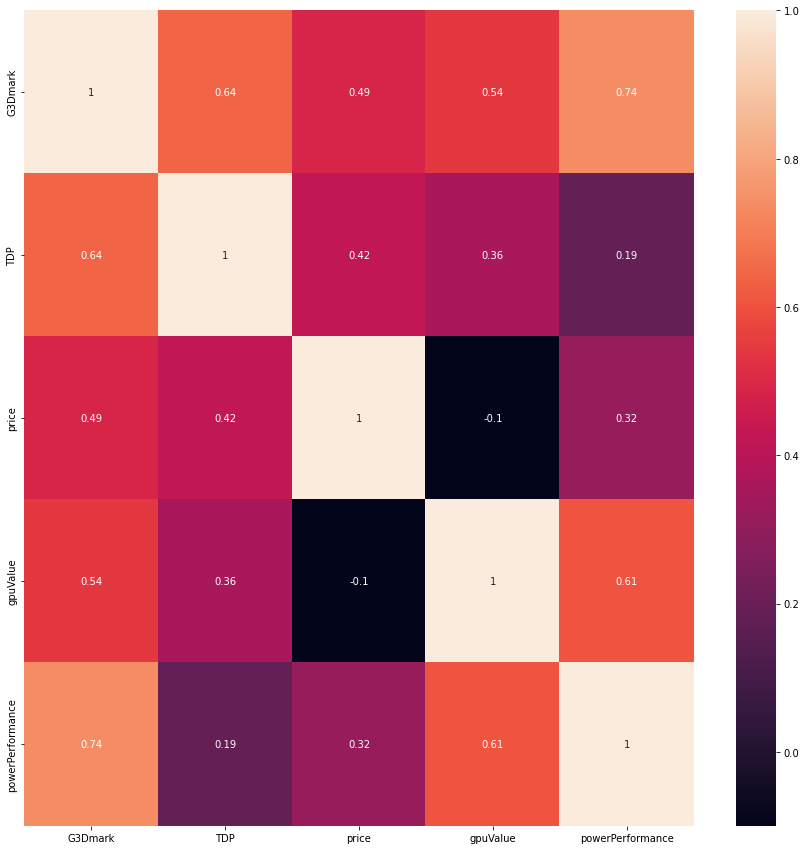

In [ ]:
figura = plt.figure(figsize=(15,15))
sns.heatmap(boards.corr(),annot = True);

(array([496.,  33.,  15.,   2.,   2.,   3.,   1.,   0.,   0.,   1.]),
 array([  17.5 ,  915.65, 1813.8 , 2711.95, 3610.1 , 4508.25, 5406.4 ,
        6304.55, 7202.7 , 8100.85, 8999.  ]),
 <a list of 10 Patch objects>)

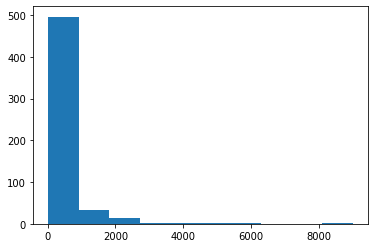

In [ ]:
plt.hist(x=boards['price'])

A princípio serão comparadas as colunas TDP e G3Dmark (nota da ferramenta, quanto mais alta melhor)

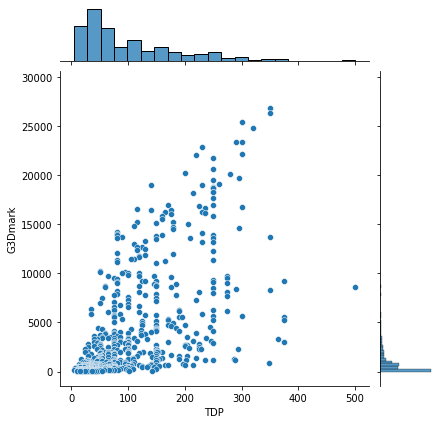

In [ ]:
sns.jointplot(data = boards, x ='TDP', y = 'G3Dmark')

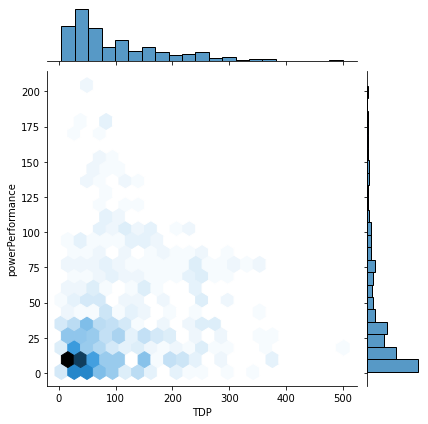

In [ ]:
sns.jointplot(data=boards, x='TDP', y='powerPerformance', kind="hex")

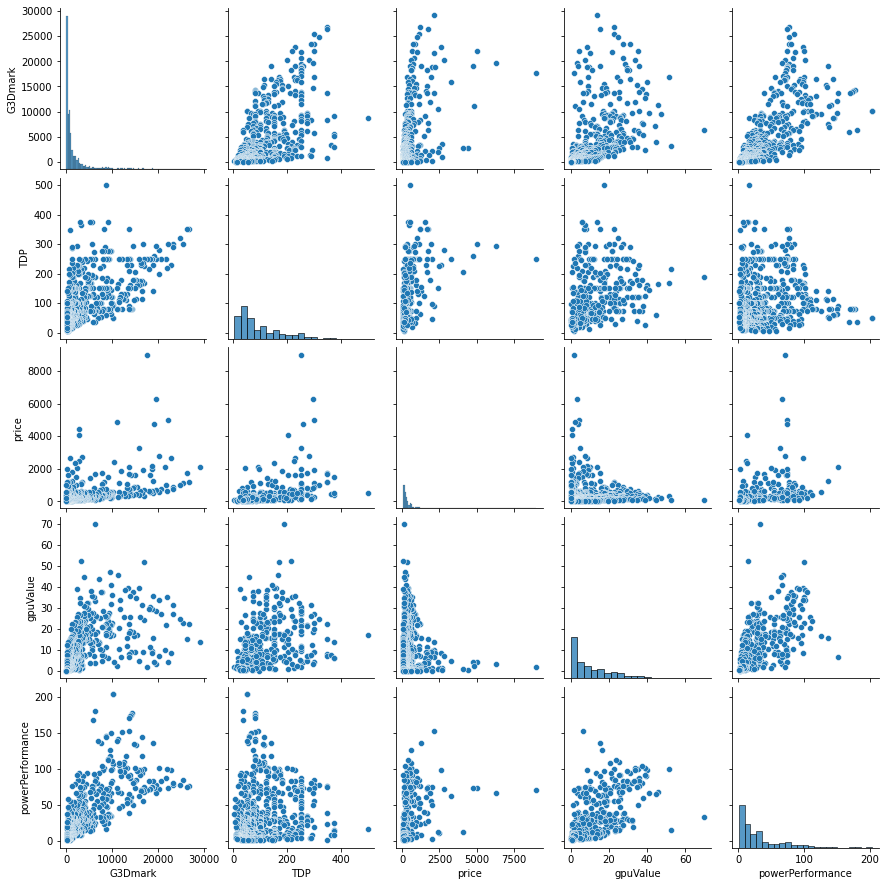

In [ ]:
sns.pairplot(boards)

# Preparação dos Dados

Drop de valores nulos em cada coluna específica


In [ ]:
boards = boards.dropna(subset=['price'])
boards = boards.dropna(subset=['TDP'])
boards = boards.dropna(subset=['powerPerformance'])

Drop de coluna do tipo string

In [ ]:
boards.drop('gpuName', axis = 1, inplace=True)
boards.drop('category', axis = 1, inplace=True)


In [ ]:
boards.head()

,G3Dmark,G2Dmark,TDP,price,gpuValue,powerPerformance
1,26878,"1,030",350.0,1199.99,22.40,77.0
2,26395,999,350.0,1749.99,15.08,75.0
3,25445,"1,103",300.0,1120.31,22.71,85.0
4,24850,"1,003",320.0,999.00,24.87,78.0
5,23372,"1,078",300.0,859.00,27.21,78.0


Alteração do dtype da coluna G2Dmark e G3Dmark para melhor análise

In [ ]:
boards['G3Dmark'] = boards['G3Dmark'].astype(float)

In [ ]:
boards['G2Dmark'] = pd.to_numeric(boards['G2Dmark'].str.replace(',', ''))

Separação de x data e y data para treinamento e previsão

In [ ]:
x_data = boards.drop(columns=['G3Dmark'], axis = 1 )


In [ ]:
y_data = boards.iloc[:,0]


Normalização dos dados

In [ ]:
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)


In [ ]:
x_data_treinamento, x_data_teste, y_data_treinamento, y_data_teste = train_test_split(x_data, y_data, test_size = 0.2, random_state = 25)

#Aplicação do modelo de regressão linear proposto

##Treinamento

In [ ]:
regressao = LinearRegression()
regressao.fit(x_data_treinamento, y_data_treinamento)

LinearRegression()

In [ ]:
regressao.coef_


array([1051.66189318, 2399.70816774,  686.32359622,  -12.14839794,
       2917.93832561])

In [ ]:
coef_df = pd.DataFrame(regressao.coef_, columns=['Coeficiente'])
coef_df

,Coeficiente
0,1051.661893
1,2399.708168
2,686.323596
3,-12.148398
4,2917.938326


##Previsão de dados de teste

Os ajustes ao modelo foram feitos, agora é o momento da avaliação do desempenho e prever os valores de teste

In [ ]:
regressao.score(x_data_teste, y_data_teste), regressao.score(x_data_treinamento, y_data_treinamento)

(0.836915041609673, 0.8641279794640456)

In [ ]:
predicao = regressao.predict(x_data_teste)

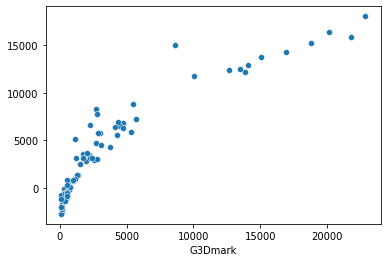

In [ ]:
sns.scatterplot(x=y_data_teste, y=predicao)

# Avaliação do modelo

##Resultados

Podemos observar que o desempenho do modelo proposto é considerado bom visto que atinge 83% de acurácia

In [ ]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_data_teste, predicao))
print('MSE', metrics.mean_squared_error(y_data_teste, predicao))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_data_teste, predicao)))
print('R^2 : ', metrics.r2_score(y_data_teste, predicao))

MAE 1756.27211402092
MSE 5054430.640421441
RMSE 2248.2060938493696
R^2 :  0.836915041609673


## Resíduos

E por fim o cálculo dos resíduos para confirmação da manipulação e exibição dos dados bem como regressão linear proposta

In [ ]:
residuos = y_data_teste - predicao

(array([ 2.,  3.,  3., 12., 12., 19., 15.,  7.,  2.,  2.]),
 array([-6412.48614901, -5173.85433199, -3935.22251497, -2696.59069795,
        -1457.95888093,  -219.32706391,  1019.30475311,  2257.93657013,
         3496.56838716,  4735.20020418,  5973.8320212 ]),
 <a list of 10 Patch objects>)

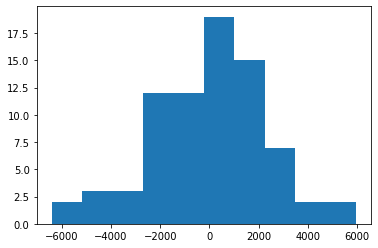

In [ ]:
plt.hist(residuos)